# RecSys Utoppia

In [2]:
# Demo recsys boolean (0-1)

# import libraries


%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from operator import itemgetter
#import plotly.plotly as py
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline()

In [2]:
# tags

tags=['Cine', 'Teatro', 'Cervezas', 'Vino', 'Fiesta', 'Viajes', 'Rock' ,'Pop',
      'Jazz', 'Techno', 'RAP', 'Indie', 'Correr', 'Gym', 'Golf', 'Basket', 'Football', 'Yoga']

In [3]:
# subtags

st_cine=['Drama', 'Comedia_c', 'Terror', 'Anime']

In [4]:
st_teatro=['Tragedia', 'Comedia_t', 'Mimica', 'Dramatico']

In [5]:
st_cerveza=['Lager', 'Pale Ale', 'Artesanas', 'Pilsener']

In [6]:
st_vino=['Blanco', 'Tinto', 'Rosado', 'Espumoso']

In [7]:
st_viajes=['En grupo', 'Solo']

In [8]:
st_rock=['Alternativo_r', 'Heavy', 'Country', 'Grunge']

In [9]:
st_pop=['Latino', 'Punk', 'Hard', 'Folk_p']

In [10]:
st_jazz=['Cool', 'Free', 'Smooth', 'Acid_j']

In [11]:
st_techno=['Minimal', 'House' ,'Hardcore', 'Acid_t']

In [12]:
st_rap=['Gangsta', 'Poetico', 'Politico' ,'Instrumental']

In [13]:
st_indie=['Alternativo_i', 'Electronico', 'Folk_i', 'Griendie']

In [14]:
st_football=['Sala', '7', '11']

In [15]:
st_yoga=['Vinyasa', 'Kundalini', 'Bikram', 'Nidra']

In [16]:
# empty dataframe

columnas=['Nombre', 'Id', 'Plan']+tags+st_cine+st_teatro+st_cerveza+st_vino+st_viajes+st_rock+st_pop+st_jazz+\
        st_techno+st_rap+st_indie+st_football+st_yoga

data=pd.DataFrame(columns=columnas)
data

,Nombre,Id,Plan,Cine,Teatro,Cervezas,Vino,Fiesta,Viajes,Rock,...,Electronico,Folk_i,Griendie,Sala,7,11,Vinyasa,Kundalini,Bikram,Nidra


In [17]:
# users

user1={columnas[0]:'Marta', columnas[1]:1, columnas[2]: 1, 
       
       columnas[3]:2/3, columnas[4]:0, columnas[5]:2/3, columnas[6]:2/3, columnas[7]:0, columnas[8]:2/3,
       columnas[9]:0 ,columnas[10]:2/3, columnas[11]:0, columnas[12]:2/3, columnas[13]:0, columnas[14]:2/3,
       columnas[15]:0, columnas[16]:2/3, columnas[17]:2/3, columnas[18]:0, columnas[19]:0, columnas[20]:2/3,
       
       columnas[21]:1/3, columnas[22]:1/3, columnas[23]:0, columnas[24]:0, 
       columnas[25]:0, columnas[26]:0, columnas[27]:0, columnas[28]:0, 
       columnas[29]:1/3, columnas[30]:1/3, columnas[31]:1/3, columnas[32]:0,
       columnas[33]:1/3, columnas[34]:1/3, columnas[35]:0, columnas[36]:0, 
       columnas[37]:1/3, columnas[38]:1/3, 
       columnas[39]:0, columnas[40]:0, columnas[41]:0, columnas[42]:0, 
       columnas[43]:1/3, columnas[44]:0, columnas[45]:0, columnas[46]: 1/3, 
       columnas[47]:0, columnas[48]:0, columnas[49]:0, columnas[50]:0, 
       columnas[51]:0, columnas[52]:1/3, columnas[53]:0, columnas[54]:0, 
       columnas[55]:0, columnas[56]:0, columnas[57]:0, columnas[58]:0, 
       columnas[59]:1/3, columnas[60]:1/3, columnas[61]:0, columnas[62]:0, 
       columnas[63]:0, columnas[64]:0, columnas[65]:0, 
       columnas[66]:1/3, columnas[67]:0, columnas[68]:0, columnas[69]:0}

In [18]:
user2={columnas[0]:'Juan', columnas[1]:2, columnas[2]: 1, 
       
       columnas[3]:2/3, columnas[4]:2/3, columnas[5]:0, columnas[6]:2/3, columnas[7]:2/3, columnas[8]:0,
       columnas[9]:0 ,columnas[10]:2/3, columnas[11]:0, columnas[12]:2/3, columnas[13]:2/3, columnas[14]:0,
       columnas[15]:0, columnas[16]:2/3, columnas[17]:2/3, columnas[18]:0, columnas[19]:2/3, columnas[20]:0,
       
       columnas[21]:1/3, columnas[22]:0, columnas[23]:0, columnas[24]:1/3, 
       columnas[25]:1/3, columnas[26]:0, columnas[27]:0, columnas[28]:1/3, 
       columnas[29]:0, columnas[30]:0, columnas[31]:0, columnas[32]:0,
       columnas[33]:0, columnas[34]:1/3, columnas[35]:0, columnas[36]:1/3, 
       columnas[37]:0, columnas[38]:0, 
       columnas[39]:0, columnas[40]:0, columnas[41]:0, columnas[42]:0, 
       columnas[43]:0, columnas[44]:1/3, columnas[45]:1/3, columnas[46]:0, 
       columnas[47]:0, columnas[48]:0, columnas[49]:0, columnas[50]:0, 
       columnas[51]:1/3, columnas[52]:1/3, columnas[53]:0, columnas[54]:0, 
       columnas[55]:1/3, columnas[56]:1/3, columnas[57]:0, columnas[58]:0, 
       columnas[59]:0, columnas[60]:0, columnas[61]:0, columnas[62]:0, 
       columnas[63]:0, columnas[64]:0, columnas[65]:1/3, 
       columnas[66]:0, columnas[67]:0, columnas[68]:0, columnas[69]:0}

In [19]:
user3={columnas[0]:'Monica', columnas[1]:3, columnas[2]: 1, 
       
       columnas[3]:2/3, columnas[4]:2/3, columnas[5]:0, columnas[6]:0, columnas[7]:0, columnas[8]:0,
       columnas[9]:0 ,columnas[10]:0, columnas[11]:0, columnas[12]:0, columnas[13]:2/3, columnas[14]:2/3,
       columnas[15]:0, columnas[16]:0, columnas[17]:0, columnas[18]:0, columnas[19]:2/3, columnas[20]:2/3,
       
       columnas[21]:1/3, columnas[22]:1/3, columnas[23]:0, columnas[24]:0, 
       columnas[25]:0, columnas[26]:1/3, columnas[27]:0, columnas[28]:1/3, 
       columnas[29]:0, columnas[30]:0, columnas[31]:0, columnas[32]:0,
       columnas[33]:0, columnas[34]:0, columnas[35]:0, columnas[36]:0, 
       columnas[37]:0, columnas[38]:0, 
       columnas[39]:0, columnas[40]:0, columnas[41]:0, columnas[42]:0, 
       columnas[43]:0, columnas[44]:0, columnas[45]:0, columnas[46]:0, 
       columnas[47]:0, columnas[48]:0, columnas[49]:0, columnas[50]:0, 
       columnas[51]:0, columnas[52]:0, columnas[53]:0, columnas[54]:0, 
       columnas[55]:1/3, columnas[56]:1/3, columnas[57]:1/3, columnas[58]:1/3, 
       columnas[59]:1/3, columnas[60]:1/3, columnas[61]:0, columnas[62]:0, 
       columnas[63]:1/3, columnas[64]:0, columnas[65]:1/3, 
       columnas[66]:1/3, columnas[67]:1/3, columnas[68]:0, columnas[69]:0}

In [20]:
user4={columnas[0]:'Alvaro', columnas[1]:4, columnas[2]: 1, 
       
       columnas[3]:2/3, columnas[4]:2/3, columnas[5]:2/3, columnas[6]:2/3, columnas[7]:0, columnas[8]:2/3,
       columnas[9]:0 ,columnas[10]:0, columnas[11]:0, columnas[12]:0, columnas[13]:0, columnas[14]:2/3,
       columnas[15]:2/3, columnas[16]:2/3, columnas[17]:2/3, columnas[18]:0, columnas[19]:2/3, columnas[20]:2/3,
       
       columnas[21]:0, columnas[22]:0, columnas[23]:1/3, columnas[24]:1/3, 
       columnas[25]:0, columnas[26]:0, columnas[27]:1/3, columnas[28]:1/3, 
       columnas[29]:1/3, columnas[30]:0, columnas[31]:0, columnas[32]:1/3,
       columnas[33]:0, columnas[34]:1/3, columnas[35]:1/3, columnas[36]:0, 
       columnas[37]:1/3, columnas[38]:1/3, 
       columnas[39]:0, columnas[40]:0, columnas[41]:0, columnas[42]:0, 
       columnas[43]:0, columnas[44]:0, columnas[45]:0, columnas[46]:0, 
       columnas[47]:0, columnas[48]:0, columnas[49]:0, columnas[50]:0, 
       columnas[51]:0, columnas[52]:0, columnas[53]:0, columnas[54]:0, 
       columnas[55]:0, columnas[56]:0, columnas[57]:0, columnas[58]:0, 
       columnas[59]:0, columnas[60]:0, columnas[61]:1/3, columnas[62]:1/3, 
       columnas[63]:1/3, columnas[64]:0, columnas[65]:0, 
       columnas[66]:0, columnas[67]:0, columnas[68]:1/3, columnas[69]:1/3}

In [21]:
user5={columnas[0]:'Maria', columnas[1]:5, columnas[2]: 1, 
       
       columnas[3]:0, columnas[4]:0, columnas[5]:0, columnas[6]:0, columnas[7]:2/3, columnas[8]:2/3,
       columnas[9]:2/3 ,columnas[10]:2/3, columnas[11]:2/3, columnas[12]:0, columnas[13]:0, columnas[14]:0,
       columnas[15]:0, columnas[16]:0, columnas[17]:2/3, columnas[18]:2/3, columnas[19]:2/3, columnas[20]:2/3,
       
       columnas[21]:0, columnas[22]:0, columnas[23]:0, columnas[24]:0, 
       columnas[25]:0, columnas[26]:0, columnas[27]:0, columnas[28]:0, 
       columnas[29]:0, columnas[30]:0, columnas[31]:0, columnas[32]:0,
       columnas[33]:0, columnas[34]:0, columnas[35]:0, columnas[36]:0, 
       columnas[37]:1/3, columnas[38]:1/3, 
       columnas[39]:1/3, columnas[40]:0, columnas[41]:0, columnas[42]:1/3, 
       columnas[43]:1/3, columnas[44]:0, columnas[45]:0, columnas[46]:0, 
       columnas[47]:1/3, columnas[48]:0, columnas[49]:0, columnas[50]:1/3, 
       columnas[51]:0, columnas[52]:0, columnas[53]:0, columnas[54]:0, 
       columnas[55]:0, columnas[56]:0, columnas[57]:0, columnas[58]:0, 
       columnas[59]:0, columnas[60]:0, columnas[61]:0, columnas[62]:0, 
       columnas[63]:0, columnas[64]:0, columnas[65]:1/3, 
       columnas[66]:0, columnas[67]:0, columnas[68]:0, columnas[69]:1/3}

In [22]:
user6={columnas[0]:'Jesus', columnas[1]:6, columnas[2]: 1, 
       
       columnas[3]:2/3, columnas[4]:0, columnas[5]:2/3, columnas[6]:2/3, columnas[7]:0, columnas[8]:2/3,
       columnas[9]:2/3, columnas[10]:0, columnas[11]:2/3, columnas[12]:2/3, columnas[13]:0, columnas[14]:2/3,
       columnas[15]:0, columnas[16]:2/3, columnas[17]:0, columnas[18]:2/3, columnas[19]:2/3, columnas[20]:2/3,
       
       columnas[21]:0, columnas[22]:0, columnas[23]:1/3, columnas[24]:1/3, 
       columnas[25]:0, columnas[26]:0, columnas[27]:0, columnas[28]:0, 
       columnas[29]:0, columnas[30]:0, columnas[31]:0, columnas[32]:1/3,
       columnas[33]:0, columnas[34]:0, columnas[35]:0, columnas[36]:1/3, 
       columnas[37]:0, columnas[38]:1/3, 
       columnas[39]:1/3, columnas[40]:1/3, columnas[41]:0, columnas[42]:1/3, 
       columnas[43]:0, columnas[44]:0, columnas[45]:0, columnas[46]:0, 
       columnas[47]:0, columnas[48]:0, columnas[49]:0, columnas[50]:1/3, 
       columnas[51]:1/3, columnas[52]:0, columnas[53]:0, columnas[54]:1/3, 
       columnas[55]:0, columnas[56]:0, columnas[57]:0, columnas[58]:0, 
       columnas[59]:1/3, columnas[60]:0, columnas[61]:0, columnas[62]:1/3, 
       columnas[63]:0, columnas[64]:0, columnas[65]:1/3, 
       columnas[66]:1/3, columnas[67]:0, columnas[68]:0, columnas[69]:1/3}

In [23]:
user7={columnas[0]:'Alba', columnas[1]:7, columnas[2]: 1, 
       
       columnas[3]:2/3, columnas[4]:0, columnas[5]:2/3, columnas[6]:2/3, columnas[7]:2/3, columnas[8]:2/3,
       columnas[9]:0 ,columnas[10]:2/3, columnas[11]:2/3, columnas[12]:2/3, columnas[13]:2/3, columnas[14]:0,
       columnas[15]:2/3, columnas[16]:2/3, columnas[17]:0, columnas[18]:0, columnas[19]:0, columnas[20]:2/3,
       
       columnas[21]:1/3, columnas[22]:1/3, columnas[23]:0, columnas[24]:0, 
       columnas[25]:0, columnas[26]:0, columnas[27]:0, columnas[28]:0, 
       columnas[29]:1/3, columnas[30]:0, columnas[31]:0, columnas[32]:1/3,
       columnas[33]:1/3, columnas[34]:0, columnas[35]:1/3, columnas[36]:1/3, 
       columnas[37]:1/3, columnas[38]:0, 
       columnas[39]:0, columnas[40]:0, columnas[41]:0, columnas[42]:0, 
       columnas[43]:1/3, columnas[44]:0, columnas[45]:0, columnas[46]:0, 
       columnas[47]:1/3, columnas[48]:0, columnas[49]:0, columnas[50]:1/3, 
       columnas[51]:0, columnas[52]:0, columnas[53]:0, columnas[54]:1/3, 
       columnas[55]:0, columnas[56]:0, columnas[57]:0, columnas[58]:1/3, 
       columnas[59]:0, columnas[60]:0, columnas[61]:0, columnas[62]:0, 
       columnas[63]:0, columnas[64]:0, columnas[65]:0, 
       columnas[66]:1/3, columnas[67]:0, columnas[68]:1/3, columnas[69]:0}

In [24]:
user8={columnas[0]:'Adolfo', columnas[1]:8, columnas[2]: 1, 
       
       columnas[3]:2/3, columnas[4]:0, columnas[5]:0, columnas[6]:2/3, columnas[7]:0, columnas[8]:2/3,
       columnas[9]:2/3 ,columnas[10]:0, columnas[11]:2/3, columnas[12]:2/3, columnas[13]:0, columnas[14]:0,
       columnas[15]:2/3, columnas[16]:2/3, columnas[17]:2/3, columnas[18]:2/3, columnas[19]:2/3, columnas[20]:0,
       
       columnas[21]:1/3, columnas[22]:0, columnas[23]:0, columnas[24]:1/3, 
       columnas[25]:0, columnas[26]:0, columnas[27]:0, columnas[28]:0, 
       columnas[29]:0, columnas[30]:0, columnas[31]:0, columnas[32]:0,
       columnas[33]:0, columnas[34]:0, columnas[35]:1/3, columnas[36]:1/3, 
       columnas[37]:1/3, columnas[38]:1/3, 
       columnas[39]:1/3, columnas[40]:0, columnas[41]:0, columnas[42]:1/3, 
       columnas[43]:0, columnas[44]:0, columnas[45]:0, columnas[46]:0, 
       columnas[47]:0, columnas[48]:0, columnas[49]:1/3, columnas[50]:0, 
       columnas[51]:0, columnas[52]:0, columnas[53]:1/3, columnas[54]:1/3, 
       columnas[55]:0, columnas[56]:0, columnas[57]:0, columnas[58]:0, 
       columnas[59]:0, columnas[60]:0, columnas[61]:0, columnas[62]:0, 
       columnas[63]:0, columnas[64]:1/3, columnas[65]:1/3, 
       columnas[66]:0, columnas[67]:0, columnas[68]:0, columnas[69]:0}

In [25]:
user9={columnas[0]:'Nuria', columnas[1]:9, columnas[2]: 1, 
       
       columnas[3]:2/3, columnas[4]:2/3, columnas[5]:0, columnas[6]:2/3, columnas[7]:0, columnas[8]:2/3,
       columnas[9]:2/3 ,columnas[10]:0, columnas[11]:0, columnas[12]:0, columnas[13]:0, columnas[14]:2/3,
       columnas[15]:2/3, columnas[16]:2/3, columnas[17]:0, columnas[18]:0, columnas[19]:2/3, columnas[20]:0,
       
       columnas[21]:1/3, columnas[22]:1/3, columnas[23]:0, columnas[24]:0, 
       columnas[25]:0, columnas[26]:0, columnas[27]:1/3, columnas[28]:1/3, 
       columnas[29]:0, columnas[30]:0, columnas[31]:0, columnas[32]:0,
       columnas[33]:1/3, columnas[34]:0, columnas[35]:0, columnas[36]:0, 
       columnas[37]:1/3, columnas[38]:1/3, 
       columnas[39]:0, columnas[40]:1/3, columnas[41]:0, columnas[42]:1/3, 
       columnas[43]:0, columnas[44]:0, columnas[45]:0, columnas[46]:0, 
       columnas[47]:0, columnas[48]:0, columnas[49]:0, columnas[50]:0, 
       columnas[51]:0, columnas[52]:0, columnas[53]:0, columnas[54]:0, 
       columnas[55]:0, columnas[56]:0, columnas[57]:0, columnas[58]:0, 
       columnas[59]:1/3, columnas[60]:1/3, columnas[61]:0, columnas[62]:0, 
       columnas[63]:1/3, columnas[64]:0, columnas[65]:1/3, 
       columnas[66]:0, columnas[67]:0, columnas[68]:0, columnas[69]:0}

In [26]:
user10={columnas[0]:'Jaime', columnas[1]:10, columnas[2]: 1, 
       
       columnas[3]:2/3, columnas[4]:0, columnas[5]:2/3, columnas[6]:2/3, columnas[7]:2/3, columnas[8]:2/3,
       columnas[9]:0 ,columnas[10]:0, columnas[11]:2/3, columnas[12]:0, columnas[13]:0, columnas[14]:0,
       columnas[15]:0, columnas[16]:2/3, columnas[17]:2/3, columnas[18]:0, columnas[19]:2/3, columnas[20]:0,
       
       columnas[21]:1/3, columnas[22]:1/3, columnas[23]:1/3, columnas[24]:0, 
       columnas[25]:0, columnas[26]:0, columnas[27]:0, columnas[28]:0, 
       columnas[29]:1/3, columnas[30]:0, columnas[31]:0, columnas[32]:1/3,
       columnas[33]:0, columnas[34]:0, columnas[35]:0, columnas[36]:1/3, 
       columnas[37]:1/3, columnas[38]:1/3, 
       columnas[39]:0, columnas[40]:0, columnas[41]:0, columnas[42]:0, 
       columnas[43]:0, columnas[44]:0, columnas[45]:0, columnas[46]:0, 
       columnas[47]:0, columnas[48]:0, columnas[49]:0, columnas[50]:0, 
       columnas[51]:0, columnas[52]:0, columnas[53]:0, columnas[54]:0, 
       columnas[55]:0, columnas[56]:0, columnas[57]:0, columnas[58]:0, 
       columnas[59]:0, columnas[60]:0, columnas[61]:0, columnas[62]:0, 
       columnas[63]:1/3, columnas[64]:1/3, columnas[65]:1/3, 
       columnas[66]:0, columnas[67]:0, columnas[68]:0, columnas[69]:0}

In [27]:
user_list=[user1, user2, user3, user4, user5, user6, user7, user8, user9, user10]

for e in user_list:
    data=data.append(other=e, ignore_index=True)
data

,Nombre,Id,Plan,Cine,Teatro,Cervezas,Vino,Fiesta,Viajes,Rock,...,Electronico,Folk_i,Griendie,Sala,7,11,Vinyasa,Kundalini,Bikram,Nidra
0,Marta,1,1,0.666667,0,0.666667,0.666667,0,0.666667,0,...,0.333333,0,0,0,0,0,0.333333,0,0,0
1,Juan,2,1,0.666667,0.666667,0.000000,0.666667,0.666667,0.000000,0,...,0.000000,0,0,0,0,0.333333,0.000000,0,0,0
2,Monica,3,1,0.666667,0.666667,0.000000,0.000000,0,0.000000,0,...,0.333333,0,0,0.333333,0,0.333333,0.333333,0.333333,0,0
3,Alvaro,4,1,0.666667,0.666667,0.666667,0.666667,0,0.666667,0,...,0.000000,0.333333,0.333333,0.333333,0,0,0.000000,0,0.333333,0.333333
4,Maria,5,1,0.000000,0,0.000000,0.000000,0.666667,0.666667,0.666667,...,0.000000,0,0,0,0,0.333333,0.000000,0,0,0.333333
5,Jesus,6,1,0.666667,0,0.666667,0.666667,0,0.666667,0.666667,...,0.000000,0,0.333333,0,0,0.333333,0.333333,0,0,0.333333
6,Alba,7,1,0.666667,0,0.666667,0.666667,0.666667,0.666667,0,...,0.000000,0,0,0,0,0,0.333333,0,0.333333,0
7,Adolfo,8,1,0.666667,0,0.000000,0.666667,0,0.666667,0.666667,...,0.000000,0,0,0,0.333333,0.333333,0.000000,0,0,0
8,Nuria,9,1,0.666667,0.666667,0.000000,0.666667,0,0.666667,0.666667,...,0.333333,0,0,0.333333,0,0.333333,0.000000,0,0,0
9,Jaime,10,1,0.666667,0,0.666667,0.666667,0.666667,0.666667,0,...,0.000000,0,0,0.333333,0.333333,0.333333,0.000000,0,0,0


In [28]:
data.set_index('Nombre', inplace=True)
data

,Id,Plan,Cine,Teatro,Cervezas,Vino,Fiesta,Viajes,Rock,Pop,...,Electronico,Folk_i,Griendie,Sala,7,11,Vinyasa,Kundalini,Bikram,Nidra
Nombre,,,,,,,,,,,,,,,,,,,,,
Marta,1,1,0.666667,0,0.666667,0.666667,0,0.666667,0,0.666667,...,0.333333,0,0,0,0,0,0.333333,0,0,0
Juan,2,1,0.666667,0.666667,0.000000,0.666667,0.666667,0.000000,0,0.666667,...,0.000000,0,0,0,0,0.333333,0.000000,0,0,0
Monica,3,1,0.666667,0.666667,0.000000,0.000000,0,0.000000,0,0.000000,...,0.333333,0,0,0.333333,0,0.333333,0.333333,0.333333,0,0
Alvaro,4,1,0.666667,0.666667,0.666667,0.666667,0,0.666667,0,0.000000,...,0.000000,0.333333,0.333333,0.333333,0,0,0.000000,0,0.333333,0.333333
Maria,5,1,0.000000,0,0.000000,0.000000,0.666667,0.666667,0.666667,0.666667,...,0.000000,0,0,0,0,0.333333,0.000000,0,0,0.333333
Jesus,6,1,0.666667,0,0.666667,0.666667,0,0.666667,0.666667,0.000000,...,0.000000,0,0.333333,0,0,0.333333,0.333333,0,0,0.333333
Alba,7,1,0.666667,0,0.666667,0.666667,0.666667,0.666667,0,0.666667,...,0.000000,0,0,0,0,0,0.333333,0,0.333333,0
Adolfo,8,1,0.666667,0,0.000000,0.666667,0,0.666667,0.666667,0.000000,...,0.000000,0,0,0,0.333333,0.333333,0.000000,0,0,0
Nuria,9,1,0.666667,0.666667,0.000000,0.666667,0,0.666667,0.666667,0.000000,...,0.333333,0,0,0.333333,0,0.333333,0.000000,0,0,0


In [29]:
# new user function


def new_user(df, tags, Nombre, Id, Plan, Cine, Teatro, Cervezas, Vino, Fiesta, Viajes, Rock, Pop, Jazz, Techno,
            RAP, Indie, Correr, Gym, Golf, Basket, Football, Yoga, Drama, Comedia_c, Terror, Anime,
            Tragedia, Comedia_t, Mimica, Dramatico, Lager, PaleAle, Artesanas, Pilsener, Blanco,
            Tinto, Rosado, Espumoso, Engrupo, Solo, Alternativo_r, Heavy, Country, Grunge, Latino,
            Punk, Hard, Folk_p, Cool, Free, Smooth, Acid_j, Minimal, House, Hardcore, Acid_t, Gangsta,
            Poetico, Politico, Instrumental, Alternativo_i, Electronico, Folk_i, Griendie,
            Sala, Siete, Once, Vinyasa, Kundalini, Bikram, Nidra, metric='euclidean'):
    
    
    rating=[Nombre, Id, Plan, Cine, Teatro, Cervezas, Vino, Fiesta, Viajes, Rock, Pop, Jazz, Techno,
            RAP, Indie, Correr, Gym, Golf, Basket, Football, Yoga, Drama, Comedia_c, Terror, Anime,
            Tragedia, Comedia_t, Mimica, Dramatico, Lager, PaleAle, Artesanas, Pilsener, Blanco,
            Tinto, Rosado, Espumoso, Engrupo, Solo, Alternativo_r, Heavy, Country, Grunge, Latino,
            Punk, Hard, Folk_p, Cool, Free, Smooth, Acid_j, Minimal, House, Hardcore, Acid_t, Gangsta,
            Poetico, Politico, Instrumental, Alternativo_i, Electronico, Folk_i, Griendie,
            Sala, Siete, Once, Vinyasa, Kundalini, Bikram, Nidra]
    
    
    n_user={k:v for k, v in list(zip(tags, rating))}

    names=list(df.index)
    df=df.append(n_user, ignore_index=True)
    names.append(Nombre)
    df.index=names
    df=df.drop(columns=['Nombre'])

    similar = pd.DataFrame(0.8/(1 + squareform(pdist(df.iloc[:, 3:], metric))), 
                         index=df.index, columns=df.index)

    similarities = similar[Nombre].sort_values(ascending=False)
    
    closer_users=[]
    for e in similarities.index:
        if df.ix[e].Plan==1:
            closer_users.append(e)

    return (list(map(list, zip(closer_users[:10], similarities.ix[closer_users[:10]]))), df)

In [30]:
# new users ratings

print ('Your name is:')
Nombre=str(input())

Your name is:
Julio


In [31]:
print('Rate cine :')
Cine = int(input())*2/3 
if Cine!=0:
    print('Rate drama :')
    Drama = int(input())*1/3
    
    print('Rate comedy :')
    Comedia_c = int(input())*1/3
 
    print('Rate terror :')
    Terror = int(input())*1/3
 
    print('Rate anime :')
    Anime = int(input())*1/3

else:
    Drama = 0
    Comedia_c = 0
    Terror = 0
    Anime = 0


Rate cine :
0


In [32]:
print('Rate theater :')
Teatro = int(input())*2/3 
if Teatro!=0:
    print('Rate tragedia :')
    Tragedia = int(input())*1/3
    
    print('Rate comedy :')
    Comedia_t = int(input())*1/3
 
    print('Rate mimics :')
    Mimica = int(input())*1/3
 
    print('Rate drama :')
    Dramatico = int(input())*1/3

else:
    Tragedia = 0
    Comedia_t = 0
    Mimica = 0
    Dramatico = 0


Rate theater :
1
Rate tragedia :
0
Rate comedy :
1
Rate mimics :
0
Rate drama :
1


In [33]:
print('Rate beers :')
Cervezas = int(input())*2/3 
if Cervezas!=0:
    print('Rate lager :')
    Lager = int(input())*1/3
    
    print('Rate pale ale :')
    PaleAle = int(input())*1/3
 
    print('Rate home made beer :')
    Artesanas = int(input())*1/3
 
    print('Rate pilsener :')
    Pilsener = int(input())*1/3

else:
    Lager = 0
    PaleAle = 0
    Artesanas = 0
    Pilsener = 0


Rate beers :
1
Rate lager :
1
Rate pale ale :
1
Rate home made beer :
1
Rate pilsener :
0


In [34]:
print('Rate wine :')
Vino = int(input())*2/3 
if Vino!=0:
    print('Rate white wine :')
    Blanco = int(input())*1/3
    
    print('Rate red wine :')
    Tinto = int(input())*1/3
 
    print('Rate pink wine :')
    Rosado = int(input())*1/3
 
    print('Rate sparkling wine :')
    Espumoso = int(input())*1/3

else:
    Blanco = 0
    Tinto = 0
    Rosado = 0
    Espumoso = 0


Rate wine :
1
Rate white wine :
1
Rate red wine :
0
Rate pink wine :
0
Rate sparkling wine :
0


In [35]:
print('Rate party :')
Fiesta = int(input())*2/3 

Rate party :
1


In [36]:
print('Rate trips :')
Viajes = int(input())*2/3 
if Viajes!=0:
    print('Rate trips in group :')
    Engrupo = int(input())*1/3
    
    print('Rate trips alone :')
    Solo = int(input())*1/3


else:
    Engrupo = 0
    Solo = 0


Rate trips :
1
Rate trips in group :
1
Rate trips alone :
1


In [37]:
print('Rate rock :')
Rock = int(input())*2/3 
if Rock!=0:
    print('Rate alternative rock :')
    Alternativo_r = int(input())*1/3
    
    print('Rate heavy :')
    Heavy = int(input())*1/3
 
    print('Rate country :')
    Country = int(input())*1/3
 
    print('Rate Grunge :')
    Grunge = int(input())*1/3

else:
    Alternativo_r = 0
    Heavy = 0
    Country = 0
    Grunge = 0


Rate rock :
1
Rate alternative rock :
1
Rate heavy :
0
Rate country :
0
Rate Grunge :
1


In [38]:
print('Rate pop :')
Pop = int(input())*2/3 
if Pop!=0:
    print('Rate latino pop :')
    Latino = int(input())*1/3
    
    print('Rate punk :')
    Punk = int(input())*1/3
 
    print('Rate hard :')
    Hard = int(input())*1/3
 
    print('Rate folk :')
    Folk_p = int(input())*1/3

else:
    Latino = 0
    Punk = 0
    Hard = 0
    Folk_p = 0


Rate pop :
0


In [39]:
print('Rate jazz :')
Jazz = int(input())*2/3 
if Jazz!=0:
    print('Rate cool jazz :')
    Cool = int(input())*1/3
    
    print('Rate free jazz :')
    Free = int(input())*1/3
 
    print('Rate smooth jazz :')
    Smooth = int(input())*1/3
 
    print('Rate acid jazz :')
    Acid_j = int(input())*1/3

else:
    Cool = 0
    Free = 0
    Smooth = 0
    Acid_j = 0


Rate jazz :
1
Rate cool jazz :
0
Rate free jazz :
0
Rate smooth jazz :
0
Rate acid jazz :
1


In [40]:
print('Rate techno :')
Techno = int(input())*2/3 
if Techno!=0:
    print('Rate minimal :')
    Minimal = int(input())*1/3
    
    print('Rate house :')
    House = int(input())*1/3
 
    print('Rate hardcore :')
    Hardcore = int(input())*1/3
 
    print('Rate acid techno :')
    Acid_t = int(input())*1/3

else:
    Minimal = 0
    House = 0
    Hardcore = 0
    Acid_t = 0


Rate techno :
0


In [41]:
print('Rate rap :')
RAP = int(input())*2/3 
if RAP!=0:
    print('Rate gangsta :')
    Gangsta = int(input())*1/3
    
    print('Rate poetic rap :')
    Poetico = int(input())*1/3
 
    print('Rate politic rap :')
    Politico = int(input())*1/3
 
    print('Rate instrumental rap :')
    Instrumental = int(input())*1/3

else:
    Gangsta = 0
    Poetico = 0
    Politico = 0
    Instrumental = 0


Rate rap :
0


In [42]:
print('Rate indie :')
Indie = int(input())*2/3 
if Indie!=0:
    print('Rate alternative indie :')
    Alternativo_i = int(input())*1/3
    
    print('Rate electronic indie :')
    Electronico = int(input())*1/3
 
    print('Rate folk indie :')
    Folk_i = int(input())*1/3
 
    print('Rate Griendie :')
    Griendie = int(input())*1/3

else:
    Alternativo_i = 0
    Electronico = 0
    Folk_i = 0
    Griendie = 0


Rate indie :
0


In [43]:
print('Rate running :')
Correr = int(input())*2/3 

Rate running :
0


In [44]:
print('Rate gym :')
Gym = int(input())*2/3 

Rate gym :
0


In [45]:
print('Rate golf :')
Golf = int(input())*2/3 

Rate golf :
0


In [46]:
print('Rate basket :')
Basket = int(input())*2/3 

Rate basket :
0


In [47]:
print('Rate football :')
Football = int(input())*2/3 
if Football!=0:
    print('Rate indoor football :')
    Sala = int(input())*1/3
    
    print('Rate football 7 :')
    Siete = int(input())*1/3
 
    print('Rate football 11 :')
    Once = int(input())*1/3


else:
    Sala = 0
    Siete = 0
    Once = 0


Rate football :
0


In [48]:
print('Rate yoga :')
Yoga = int(input())*2/3 
if Yoga!=0:
    print('Rate vinyasa yoga :')
    Vinyasa = int(input())*1/3
    
    print('Rate kundalini yoga :')
    Kundalini = int(input())*1/3
 
    print('Rate bikram yoga :')
    Bikram = int(input())*1/3
 
    print('Rate nidra yoga :')
    Nidra = int(input())*1/3

else:
    Vinyasa = 0
    Kundalini = 0
    Bikram = 0
    Nidra = 0

Rate yoga :
0


In [49]:
res_n_user=new_user(data, columnas, Nombre, len(data)+1, 0, Cine, Teatro, Cervezas, Vino, Fiesta, 
                    Viajes, Rock, Pop, Jazz, Techno, RAP, Indie, Correr, Gym, Golf, Basket, 
                    Football, Yoga, Drama, Comedia_c, Terror, Anime, Tragedia, Comedia_t, Mimica, 
                    Dramatico, Lager, PaleAle, Artesanas, Pilsener, Blanco, Tinto, Rosado, Espumoso, 
                    Engrupo, Solo, Alternativo_r, Heavy, Country, Grunge, Latino,Punk, Hard, Folk_p, 
                    Cool, Free, Smooth, Acid_j, Minimal, House, Hardcore, Acid_t, Gangsta, Poetico, 
                    Politico, Instrumental, Alternativo_i, Electronico, Folk_i, Griendie,
                    Sala, Siete, Once, Vinyasa, Kundalini, Bikram, Nidra)

In [50]:
plans=res_n_user[0]
data=res_n_user[1]

In [51]:
print ('Similar users with plan : ')
for e in plans:
    print (e[0])
    

final=pd.DataFrame()
final['plan_ori_id']=[e[0] for e in plans]
final['original_similarity']=[e[1] for e in plans]

Similar users with plan : 
Jaime
Nuria
Maria
Alba
Jesus
Adolfo
Alvaro
Marta
Monica
Juan


In [52]:
# follow-unfollow users
foll=plans

def follow(_id, b, foll):
    if b==0: return foll
    elif b==1:
        for e in foll:
            if _id==e[0]:
                e[1]+=e[1]*0.15
        for e in foll:
            if e[1]>1:e[1]=1
        return foll

print ()
for e in foll:
    print ('Follow user {}?'.format(e[0]))
    b=int(input())
    f=follow(e[0], b, foll)
    #print (f)
    print()
#final['follow_id']=[e[0] for e in f]
final['after_follow_similarity']=[e[1] for e in f]


Follow user Jaime?
1

Follow user Nuria?
1

Follow user Maria?
1

Follow user Alba?
1

Follow user Jesus?
0

Follow user Adolfo?
0

Follow user Alvaro?
0

Follow user Marta?
0

Follow user Monica?
0

Follow user Juan?
0



In [53]:
final

,plan_ori_id,original_similarity,after_follow_similarity
0,Jaime,0.333333,0.383333
1,Nuria,0.316431,0.363896
2,Maria,0.316431,0.363896
3,Alba,0.297883,0.342565
4,Jesus,0.295816,0.295816
5,Adolfo,0.293798,0.293798
6,Alvaro,0.289898,0.289898
7,Marta,0.289898,0.289898
8,Monica,0.277514,0.277514
9,Juan,0.275887,0.275887


In [54]:
w_likes=foll
def like(_id, b, serie_like):
    if b==0: return serie_like
    elif b==1:
        for e in serie_like:
            if _id==e[0]:
                e[1]+=0.01
        for e in serie_like:
            if e[1]>1:e[1]=1
        return serie_like

print ()
for e in w_likes:
    print ('Do you like the user {} plan?'.format(e[0]))
    b=int(input())
    l=like(e[0], b, w_likes)
    print()
final['with likes after follow']=[e[1] for e in f]


Do you like the user Jaime plan?
1

Do you like the user Nuria plan?
1

Do you like the user Maria plan?
1

Do you like the user Alba plan?
1

Do you like the user Jesus plan?
1

Do you like the user Adolfo plan?
1

Do you like the user Alvaro plan?
0

Do you like the user Marta plan?
0

Do you like the user Monica plan?
0

Do you like the user Juan plan?
0



In [55]:
unfoll=w_likes
def unfollow(_id, b, unfoll):
    if b==0: return unfoll
    elif b==1:
        for e in unfoll:
            if _id==e[0]:
                e[1]-=e[1]*0.15
        for e in unfoll:
            if e[1]<0:e[1]=0
        return unfoll#sorted(unfoll, key=itemgetter(1), reverse=True)

print ()
for e in unfoll:
    print ('Unfollow user {}?'.format(e[0]))
    b=int(input())
    u=unfollow(e[0], b, unfoll)
    #print (u)
    print()
#final['unfollow_id']=[e[0] for e in u]
final['after_unfollow_similarity']=[e[1] for e in u]
display (final)


Unfollow user Jaime?
1

Unfollow user Nuria?
1

Unfollow user Maria?
0

Unfollow user Alba?
0

Unfollow user Jesus?
0

Unfollow user Adolfo?
1

Unfollow user Alvaro?
1

Unfollow user Marta?
1

Unfollow user Monica?
0

Unfollow user Juan?
0



,plan_ori_id,original_similarity,after_follow_similarity,with likes after follow,after_unfollow_similarity
0,Jaime,0.333333,0.383333,0.393333,0.334333
1,Nuria,0.316431,0.363896,0.373896,0.317811
2,Maria,0.316431,0.363896,0.373896,0.373896
3,Alba,0.297883,0.342565,0.352565,0.352565
4,Jesus,0.295816,0.295816,0.305816,0.305816
5,Adolfo,0.293798,0.293798,0.303798,0.258228
6,Alvaro,0.289898,0.289898,0.289898,0.246413
7,Marta,0.289898,0.289898,0.289898,0.246413
8,Monica,0.277514,0.277514,0.277514,0.277514
9,Juan,0.275887,0.275887,0.275887,0.275887


In [56]:
w_likes_un=unfoll
def like_un(_id, b, serie_like):
    if b==0: return serie_like
    elif b==1:
        for e in serie_like:
            if _id==e[0]:
                e[1]+=0.01
        for e in serie_like:
            if e[1]>1:e[1]=1
        return serie_like

print ()
for e in w_likes_un:
    print ('Do you like the user {} plan?'.format(e[0]))
    b=int(input())
    l=like_un(e[0], b, w_likes_un)
    print()
final['with likes after unfollow']=[e[1] for e in f]


Do you like the user Jaime plan?
0

Do you like the user Nuria plan?
0

Do you like the user Maria plan?
0

Do you like the user Alba plan?
0

Do you like the user Jesus plan?
0

Do you like the user Adolfo plan?
0

Do you like the user Alvaro plan?
1

Do you like the user Marta plan?
1

Do you like the user Monica plan?
1

Do you like the user Juan plan?
0



In [57]:
final.iplot(kind='bar', x='plan_ori_id', title='Similarities with {}'.format(Nombre), 
            yTitle='Similarity', xTitle='Users')

In [58]:
end_similarity=final.sort_values(by=['with likes after unfollow'], ascending=False)
#end_similarity

In [59]:
end_similarity.iplot(kind='bar', x='plan_ori_id', title='Final similarities with {}'.format(Nombre), 
            yTitle='Similarity', xTitle='Users')

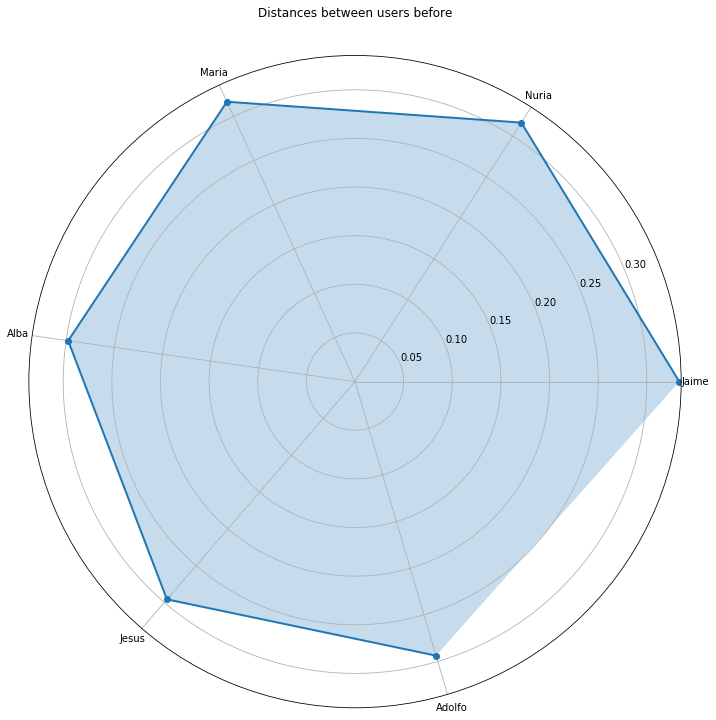

In [60]:
fig=plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, polar=True)
ax.plot(final['plan_ori_id'].head(6), final['original_similarity'].head(6), 'o-', linewidth=2)
ax.fill(final['plan_ori_id'].head(6), final['original_similarity'].head(6), alpha=0.25)
ax.set_title('Distances between users before')
ax.grid(True)

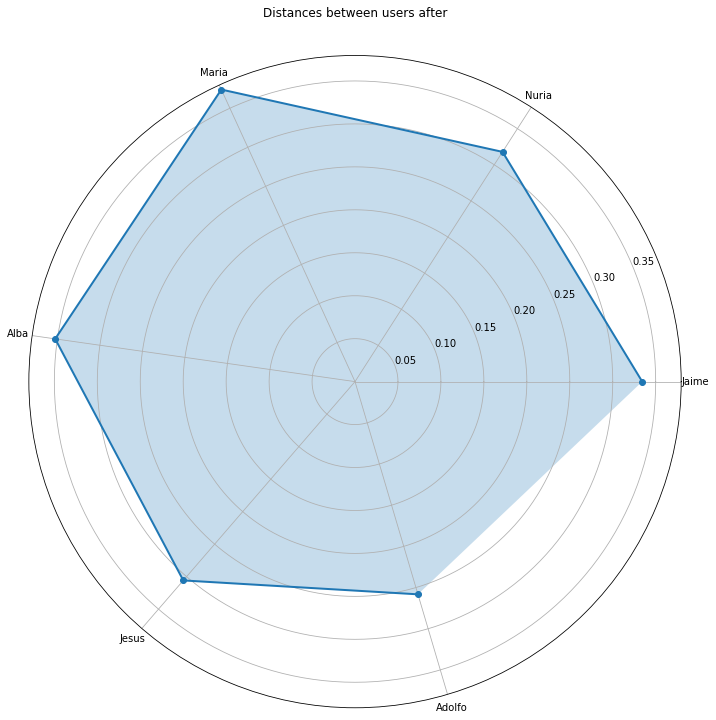

In [61]:
fig=plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, polar=True)
ax.plot(final['plan_ori_id'].head(6), final['with likes after unfollow'].head(6), 'o-', linewidth=2)
ax.fill(final['plan_ori_id'].head(6), final['with likes after unfollow'].head(6), alpha=0.25)
ax.set_title('Distances between users after')
ax.grid(True)